# Lab 1 - Write programs for implementing simple intelligent agents.

In [3]:
# Lab 1
# Vaccum Cleaner Agent
from enum import Enum

class TileStatus(Enum):
  DIRTY = "DIRTY"
  CLEAN = "CLEAN"

class Location(Enum):
  LEFT = "LEFT"
  RIGHT = "RIGHT"

class Action(Enum):
  SUCK_TILE = "SUCK_TILE"
  MOVE_LEFT = "MOVE_LEFT"
  MOVE_RIGHT = "MOVE_RIGHT"

def vaccum_agent(location : Location, status : TileStatus)-> TileStatus | Action:
  if status == TileStatus.DIRTY:
    return Action.SUCK_TILE
  match location:
    case Location.LEFT:
      return Action.MOVE_RIGHT
    case Location.RIGHT:
      return Action.MOVE_LEFT
    case _:
      raise Exception("This Should Never Happen, All States must be defined")

In [4]:
# Traffic Light Agent
class TrafficStates(Enum):
  RED = 1
  GREEN = 2
  YELLOW = 3

def traffic_light(current_state : TrafficStates) -> TrafficStates:
  match current_state:
    case TrafficStates.RED:
      return TrafficStates.GREEN
    case TrafficStates.YELLOW:
      return TrafficStates.RED
    case TrafficStates.GREEN:
      return TrafficStates.YELLOW
    case _:
      raise Exception("Undefined State")

In [13]:
# Lab 1 Run
print(vaccum_agent(Location.RIGHT, TileStatus.DIRTY))
print(vaccum_agent(Location.LEFT, TileStatus.CLEAN))
print(vaccum_agent(Location.RIGHT, TileStatus.CLEAN))
print(traffic_light(TrafficStates.RED))
print(traffic_light(TrafficStates.GREEN))
print(traffic_light(TrafficStates.YELLOW))

Action.SUCK_TILE
Action.MOVE_RIGHT
Action.MOVE_LEFT
TrafficStates.GREEN
TrafficStates.YELLOW
TrafficStates.RED


# Lab 2 - Various Search Algorithms

In [17]:
# Node class
from typing import List, Set

class Node:
    def __init__(self, value: str) -> None:
        self.value = value
        self.children: List[Node] = []

    def add_child(self, child_node: 'Node') -> None:
        self.children.append(child_node)


In [18]:
def dfs(start_node: Node) -> None:
    """Depth-First Search"""
    visited: Set[Node] = set()
    stack: List[Node] = [start_node]

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            print(node.value)
            for child in node.children[::-1]:
                stack.append(child)

def bfs(start_node: Node) -> None:
    """Breadth-First Search"""
    visited: Set[Node] = set()
    queue: List[Node] = [start_node]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            print(node.value)
            for child in node.children:
                queue.append(child)


In [20]:
root = Node("A")
b = Node("B")
c = Node("C")
d = Node("D")
e = Node("E")
f = Node("F")
g = Node("G")

root.add_child(b)
root.add_child(c)
b.add_child(d)
b.add_child(e)
c.add_child(f)
c.add_child(g)

# Depth-First Search
print("DFS:")
dfs(root)
print()

# Breadth-First Search
print("BFS:")
bfs(root)

DFS:
A
B
D
E
C
F
G

BFS:
A
B
C
D
E
F
G


In [25]:
from queue import PriorityQueue

def a_star(graph, start, goal, h):
    open_set = PriorityQueue()
    open_set.put((0, start))
    g = {start: 0}
    while not open_set.empty():
        _, current = open_set.get()
        if current == goal:
            return g[goal]
        for neighbor, cost in graph[current].items():
            tentative_g = g[current] + cost
            if neighbor not in g or tentative_g < g[neighbor]:
                g[neighbor] = tentative_g
                f = tentative_g + h[neighbor]
                open_set.put((f, neighbor))
    return float("inf")

# A* Algorithm
graph = {'A': {'B': 1, 'C': 4}, 'B': {'A': 1, 'D': 5, 'E': 12}, 'C': {'A': 4, 'F': 3}, 'D': {'B': 5}, 'E': {'B': 12, 'F': 2}, 'F': {'C': 3, 'E': 2}}
heuristic = {'A': 7, 'B': 6, 'C': 2, 'D': 1, 'E': 0, 'F': 3}
print(a_star(graph, 'A', 'E', heuristic))

9


In [77]:
# Greedy Best Search Algorithm
from queue import PriorityQueue
graph = {
    'A': [('B', 1), ('C', 3)],
    'B': [('D', 5), ('E', 12)],
    'C': [('F', 7)],
    'D': [],
    'E': [('G', 2)],
    'F': [('G', 1)],
    'G': []
}
heuristics = {
    'A': 10,
    'B': 4,
    'C': 6,
    'D': 7,
    'E': 2,
    'F': 3,
    'G': 0
}

def greedy_best_first_search(start, goal):
    visited = set()
    pq = PriorityQueue()
    pq.put((heuristics[start], start))

    print("Path:")
    while not pq.empty():
        _, current = pq.get()
        print(current, end=" ")
        if current == goal:
            print("\nGoal reached")
            return
        visited.add(current)

        for neighbor, _ in graph[current]:
            if neighbor not in visited:
                pq.put((heuristics[neighbor], neighbor))

start_node = 'A'
goal_node = 'G'
greedy_best_first_search(start_node, goal_node)

Path:
A B E G 
Goal reached


# Lab - 3 Knowledge Based Questions


In [34]:
# Rule Based System (program with if then rules)
def diagnose_disease(symptoms):

    disease_rules = {
        'Flu': {'fever', 'cough'},
        'Migraine': {'fever', 'headache'},
        'Common Cold': {'cough', 'headache'},
        'Infection': {'fever'},
        'Respiratory Infection': {'cough'},
        'Tension Headache': {'headache'}
    }

    for disease, required_symptoms in disease_rules.items():
        if required_symptoms.issubset(symptoms):
            return disease

    return 'Diagnosis Uncertain'


In [35]:
# Rule Based Run
symptoms = ["fever","cold","headache"]
disease = diagnose_disease(symptoms)
print(f"Possible Disease: {disease}")

Possible Disease: Migraine


In [82]:
# Predicate Based System (using predicates like in Prolog)
class PredicateKnowledgeBase:
    def __init__(self):
        self.facts = set()
        self.rules = []

    def add_fact(self, fact):
        self.facts.add(fact)

    def add_rule(self, premise, conclusion):
        self.rules.append((premise, conclusion))

    def infer(self, query):
        for premise, conclusion in self.rules:
            if premise in self.facts and conclusion not in self.facts:
                self.add_fact(conclusion)
                print(f"Inferred: '{conclusion}' based on '{premise}'")

        return query in self.facts

In [83]:
# Predicate RUN
kb = PredicateKnowledgeBase()

kb.add_fact("Alice is a parent of Bob")
kb.add_fact("Bob is a parent of Charlie")

kb.add_rule("Alice is a parent of Bob", "Bob is a child of Alice")
kb.add_rule("Bob is a parent of Charlie", "Charlie is a grandchild of Alice")

query = "Charlie is a grandchild of Alice"
if kb.infer(query):
    print(f"{query} is known.")
else:
    print(f"{query} is not known.")

Inferred: 'Bob is a child of Alice' based on 'Alice is a parent of Bob'
Inferred: 'Charlie is a grandchild of Alice' based on 'Bob is a parent of Charlie'
Charlie is a grandchild of Alice is known.


In [84]:
# Frame Based Question
class Frame:
    def __init__(self, name, nationality, diet, location):
        self.name = name
        self.nationality = nationality
        self.diet = diet
        self.location = location

    def display(self):
        print(f"Name: {self.name}")
        print(f"Nationality: {self.nationality}")
        print(f"Diet: {self.diet}")
        print(f"Location: {self.location}")
        print()

class PersonFrame(Frame):
    def __init__(self, name, nationality, diet, location, language, greeting):
        super().__init__(name, nationality, diet, location)
        self.language = language
        self.greeting = greeting

    def say_hello(self):
        print(f"{self.name} greets you in {self.language}: {self.greeting}")


In [59]:
# Frame based Solutions
john = PersonFrame(name="John", nationality="American", diet="Omnivore", location="New York, USA", language="English", greeting="Hello!")
maria = PersonFrame(name="Maria", nationality="Spanish", diet="Mediterranean", location="Madrid, Spain", language="Spanish", greeting="¡Hola!")

john.display()
maria.display()

john.say_hello()
maria.say_hello()

Name: John
Nationality: American
Diet: Omnivore
Location: New York, USA

Name: Maria
Nationality: Spanish
Diet: Mediterranean
Location: Madrid, Spain

John greets you in English: Hello!
Maria greets you in Spanish: ¡Hola!


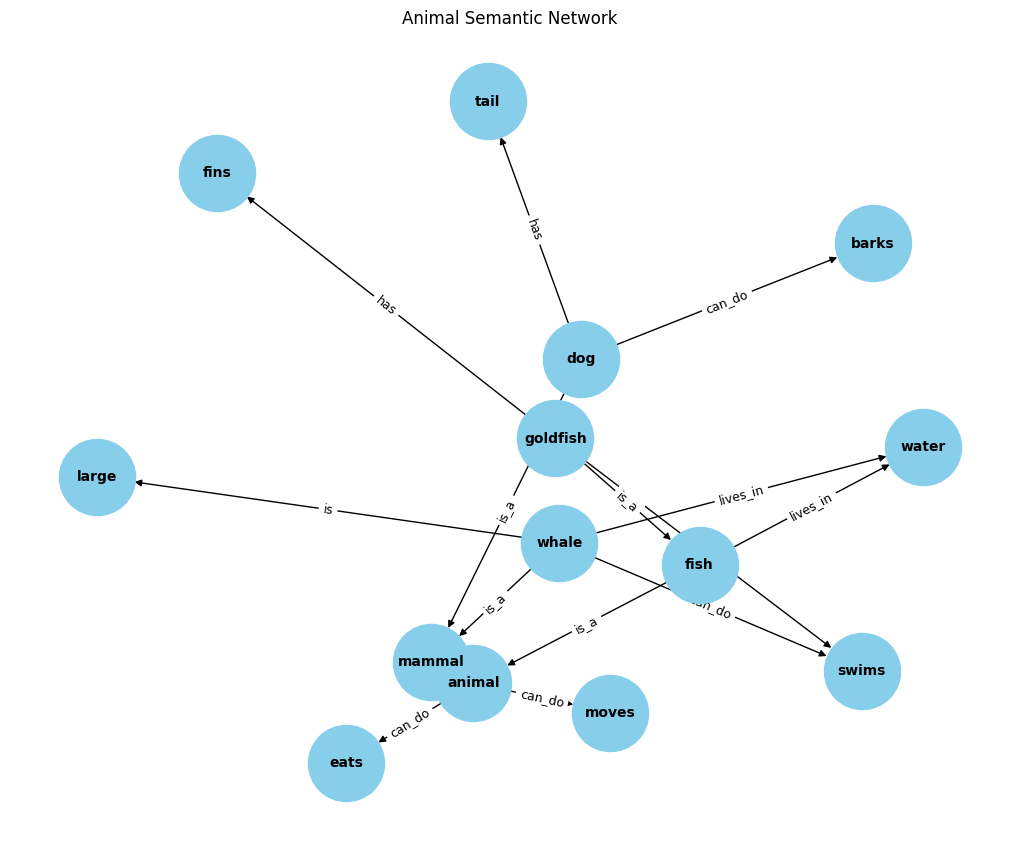

In [61]:
# Semantic Network
import networkx as nx
import matplotlib.pyplot as plt

def create_animal_semantic_network():
    G = nx.DiGraph()

    G.add_node("animal")
    G.add_node("mammal")
    G.add_node("fish")
    G.add_node("dog")
    G.add_node("whale")
    G.add_node("goldfish")
    G.add_node("tail")
    G.add_node("fins")
    G.add_node("barks")
    G.add_node("swims")
    G.add_node("large")
    G.add_node("water")

    G.add_edge("mammal", "animal", label="is_a")
    G.add_edge("fish", "animal", label="is_a")
    G.add_edge("dog", "mammal", label="is_a")
    G.add_edge("whale", "mammal", label="is_a")
    G.add_edge("goldfish", "fish", label="is_a")
    G.add_edge("animal", "eats", label="can_do")
    G.add_edge("animal", "moves", label="can_do")
    G.add_edge("dog", "barks", label="can_do")
    G.add_edge("dog", "tail", label="has")
    G.add_edge("whale", "large", label="is")
    G.add_edge("whale", "swims", label="can_do")
    G.add_edge("whale", "water", label="lives_in")
    G.add_edge("goldfish", "swims", label="can_do")
    G.add_edge("goldfish", "fins", label="has")
    G.add_edge("fish", "water", label="lives_in")

    return G

animal_semantic_network = create_animal_semantic_network()

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(animal_semantic_network)
nx.draw(animal_semantic_network, pos, with_labels=True, font_size=10, node_size=3000, node_color="skyblue", font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(animal_semantic_network, 'label')
nx.draw_networkx_edge_labels(animal_semantic_network, pos, edge_labels=edge_labels, font_size=9)
plt.title("Animal Semantic Network")
plt.show()

# Lab 4 - Machine Learning

In [65]:
# Naive Bayes
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

data = {
    "Outlook": ["Sunny", "Overcast", "Rainy", "Sunny", "Sunny", "Overcast", "Rainy"],
    "Temp": ["Hot", "Hot", "Mild", "Cool", "Hot", "Mild", "Cool"],
    "Humidity": ["High", "High", "High", "Normal", "Normal", "Normal", "High"],
    "Windy": ["False", "True", "False", "False", "True", "True", "False"],
    "Play": ["No", "Yes", "Yes", "Yes", "No", "Yes", "No"]
}

df = pd.DataFrame(data)

encoders = {col: LabelEncoder() for col in df.columns if col != "Play"}
inputs_encoded = df.copy()

for col, encoder in encoders.items():
    inputs_encoded[col] = encoder.fit_transform(df[col])

inputs = inputs_encoded.drop("Play", axis="columns")
target = df["Play"]

classifier = GaussianNB()
classifier.fit(inputs, target)
print("GaussianNB Model Trained")

predicted = classifier.predict(inputs)
print("Predictions:", predicted)


GaussianNB Model Trained
Predictions: ['No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No']


In [67]:
# Write programfor implementing Neural Networks for realization of AND, OR gates.

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

learning_rate = 0.1
epochs = 10000

def train_gate(inputs, labels):
    weights = np.random.rand(2, 1)
    bias = np.random.rand(1)

    for _ in range(epochs):
        z = np.dot(inputs, weights) + bias
        outputs = sigmoid(z)

        error = labels - outputs
        adjustments = error * sigmoid_derivative(outputs)
        weights += np.dot(inputs.T, adjustments) * learning_rate
        bias += np.sum(adjustments) * learning_rate

    return sigmoid(np.dot(inputs, weights) + bias).round()

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels_and = np.array([[0], [0], [0], [1]])  # AND gate
labels_or = np.array([[0], [1], [1], [1]])   # OR gate

print("Predictions for AND Gate:", train_gate(inputs, labels_and).flatten())
print("Predictions for OR Gate:", train_gate(inputs, labels_or).flatten())


Predictions for AND Gate: [0. 0. 0. 1.]
Predictions for OR Gate: [0. 1. 1. 1.]


In [81]:
# Write programfor implementing Backpropagation Learning.
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels_xor = np.array([[0], [1], [1], [0]])

input_neurons, hidden_neurons, output_neurons = 2, 2, 1
learning_rate, epochs = 0.5, 10000

weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

for _ in range(epochs):
    hidden_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(final_input)

    output_error = labels_xor - predicted_output
    d_output = output_error * sigmoid_derivative(predicted_output)

    hidden_error = d_output.dot(weights_hidden_output.T)
    d_hidden = hidden_error * sigmoid_derivative(hidden_output)

    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

print("Training complete for XOR using Backpropagation.")
print("Predicted Output after training:")
print(predicted_output.round())



Training complete for XOR using Backpropagation.
Predicted Output after training:
[[0.]
 [1.]
 [1.]
 [0.]]


# Lab 5 - Applications of AI

In [71]:
# Weather Prediction Algorithm

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
label_encoders = {}

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop('Play', axis=1)
y = df['Play']

classifier = DecisionTreeClassifier()
classifier.fit(X, y)
def predict_weather(outlook, temperature, humidity, windy):
    encoded_inputs = [
        label_encoders['Outlook'].transform([outlook])[0],
        label_encoders['Temperature'].transform([temperature])[0],
        label_encoders['Humidity'].transform([humidity])[0],
        label_encoders['Windy'].transform([windy])[0]
    ]
    prediction = classifier.predict([encoded_inputs])[0]
    return label_encoders['Play'].inverse_transform([prediction])[0]

In [72]:
outlook, temperature, humidity, windy = 'Sunny', 'Cool', 'High', 'True'
print(f"Weather conditions: Outlook={outlook}, Temperature={temperature}, Humidity={humidity}, Windy={windy}")
print("Prediction:", predict_weather(outlook, temperature, humidity, windy))


Weather conditions: Outlook=Sunny, Temperature=Cool, Humidity=High, Windy=True
Prediction: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [76]:
# Use library tools like NLTK to illustrate concepts of Natural Language Processing.
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


# Example text
text = "Natural Language Processing is a fascinating field of artificial intelligence. It's used in chatbots, translators, and search engines."

# Split text into sentences
sentences = sent_tokenize(text)
print("Sentences:", sentences)

# Split text into words
words = word_tokenize(text)
print("Words:", words)

### Stopwords Removal
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word.lower() not in stop_words]
print("Filtered Words:", filtered_words)

# Reduce words to their root form
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
print("Stemmed Words:", stemmed_words)

# Lemmatize words for proper root form
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized Words:", lemmatized_words)

# Identify parts of speech in the text
pos_tags = nltk.pos_tag(words)
print("POS Tags:", pos_tags)


Sentences: ['Natural Language Processing is a fascinating field of artificial intelligence.', "It's used in chatbots, translators, and search engines."]
Words: ['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', 'of', 'artificial', 'intelligence', '.', 'It', "'s", 'used', 'in', 'chatbots', ',', 'translators', ',', 'and', 'search', 'engines', '.']
Filtered Words: ['Natural', 'Language', 'Processing', 'fascinating', 'field', 'artificial', 'intelligence', '.', "'s", 'used', 'chatbots', ',', 'translators', ',', 'search', 'engines', '.']
Stemmed Words: ['natur', 'languag', 'process', 'fascin', 'field', 'artifici', 'intellig', '.', "'s", 'use', 'chatbot', ',', 'translat', ',', 'search', 'engin', '.']
Lemmatized Words: ['Natural', 'Language', 'Processing', 'fascinating', 'field', 'artificial', 'intelligence', '.', "'s", 'used', 'chatbots', ',', 'translator', ',', 'search', 'engine', '.']
POS Tags: [('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('is', 'VBZ

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
